In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
#loading the data set
df = pd.read_csv('heart.csv')
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
#dealing with missing values
#for colName, colData in df.items():
#    print(colName, ':', df[colName].isna().sum())
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#We don't have missing data
#Now exploratory data analysis
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
numeric = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
ordinal = ['caa']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall', 'output']
df[numeric].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


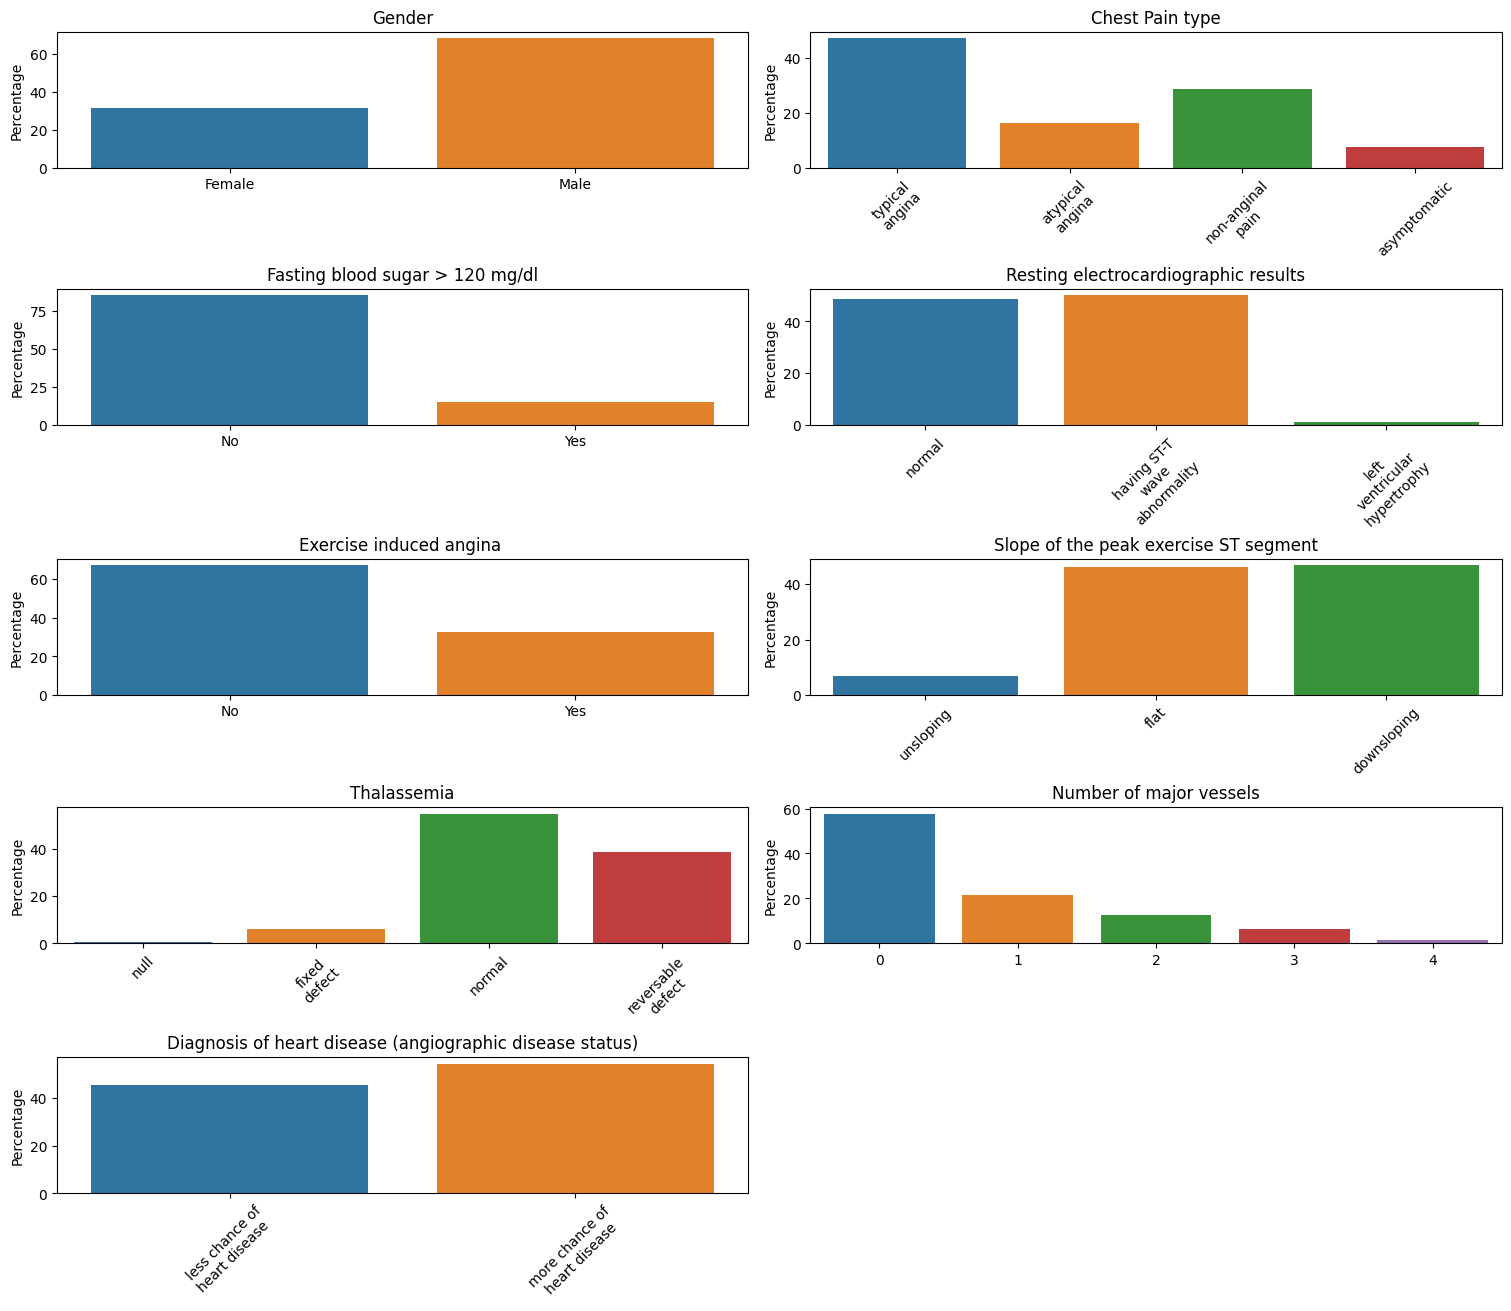

In [ ]:
#Categorical variables
fig = plt.figure(figsize=(15, 13), constrained_layout=True)

#Sex
ax0 = fig.add_subplot(5,2,1)
counts = df['sex'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax0)
ax0.set_xticklabels(['Female', 'Male'], rotation=0)
ax0.set_ylabel("Percentage")
ax0.set_title('Gender')

#Chest Pain type
ax1 = fig.add_subplot(5,2,2)
counts = df['cp'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax1)
ax1.set_xticklabels(['typical\nangina', 'atypical\nangina', 'non-anginal\npain', 'asymptomatic'], rotation=45)
ax1.set_ylabel("Percentage")
ax1.set_title('Chest Pain type')

#Fasting blood sugar > 120 mg/dl
ax2 = fig.add_subplot(5,2,3)
counts = df['fbs'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index, y=counts, ax=ax2)
ax2.set_xticklabels(['No', 'Yes'], rotation=0)
ax2.set_ylabel("Percentage")
ax2.set_title('Fasting blood sugar > 120 mg/dl')

#Resting electrocardiographic results
ax3 = fig.add_subplot(5,2,4)
counts = df['restecg'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax3)
ax3.set_xticklabels(['normal', 'having ST-T\nwave\nabnormality', 'left\nventricular\nhypertrophy'], rotation=45)
ax3.set_ylabel("Percentage")
ax3.set_title('Resting electrocardiographic results')

#Exercise induced angina 
ax4 = fig.add_subplot(5,2,5)
counts = df['exng'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax4)
ax4.set_xticklabels(['No', 'Yes'], rotation=0)
ax4.set_ylabel("Percentage")
ax4.set_title('Exercise induced angina ')

#Slope of the peak exercise ST segment
ax5 = fig.add_subplot(5,2,6)
counts = df['slp'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax5)
ax5.set_xticklabels(['unsloping', 'flat', 'downsloping'], rotation=45)
ax5.set_ylabel("Percentage")
ax5.set_title('Slope of the peak exercise ST segment')

#Thalassemia
ax6 = fig.add_subplot(5,2,7)
counts = df['thall'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax6)
ax6.set_xticklabels(['null', 'fixed\ndefect', 'normal', 'reversable\ndefect'], rotation=45)
ax6.set_ylabel("Percentage")
ax6.set_title('Thalassemia')

#Diagnosis of heart disease (angiographic disease status)
ax4 = fig.add_subplot(5,2,9)
counts = df['output'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax4)
ax4.set_xticklabels(['less chance of\nheart disease ', 'more chance of\nheart disease'], rotation=45)
ax4.set_ylabel("Percentage")
ax4.set_title('Diagnosis of heart disease (angiographic disease status)')

#Diagnosis of heart disease (angiographic disease status)
ax4 = fig.add_subplot(5,2,8)
counts = df['caa'].value_counts(normalize=True, sort=False) * 100
sns.barplot(x=counts.index,
            y=counts, ax=ax4)
ax4.set_xticklabels(['0','1', '2', '3', '4'], rotation=0)
ax4.set_ylabel("Percentage")
ax4.set_title('Number of major vessels')

plt.show()

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest')

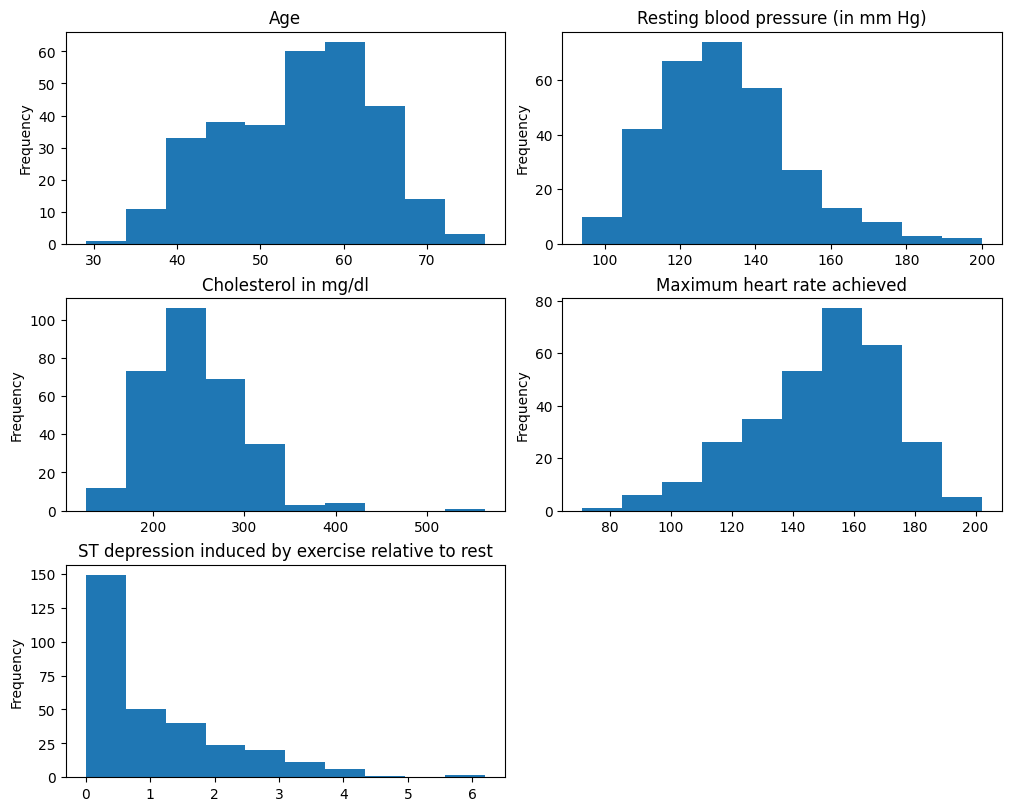

In [ ]:
#Numerical variables
#plotting quantitative data
fig = plt.figure(figsize=(10,8), constrained_layout=True)

ax0 = fig.add_subplot(3,2,1)
df.age.plot.hist(ax=ax0)
ax0.set_title('Age')

ax1 = fig.add_subplot(3,2,2)
df.trtbps.plot.hist(ax=ax1)
ax1.set_title('Resting blood pressure (in mm Hg)')

ax3 = fig.add_subplot(3,2,3)
df.chol.plot.hist(ax=ax3)
ax3.set_title('Cholesterol in mg/dl')

ax4 = fig.add_subplot(3,2,4)
df.thalachh.plot.hist(ax=ax4)
ax4.set_title('Maximum heart rate achieved')

ax5 = fig.add_subplot(3,2,5)
df.oldpeak.plot.hist(ax=ax5)
ax5.set_title('ST depression induced by exercise relative to rest')


<AxesSubplot: >

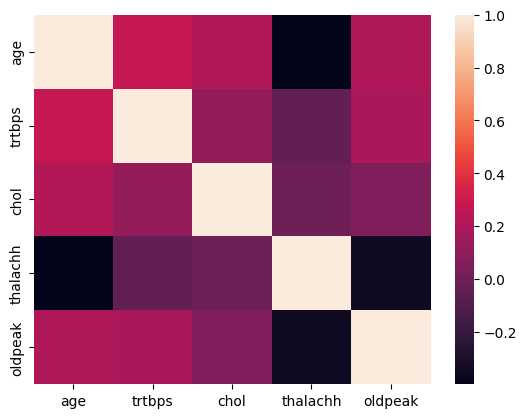

In [ ]:
#Visualizing correlations
corr = df[numeric].corr()
sns.heatmap(corr)

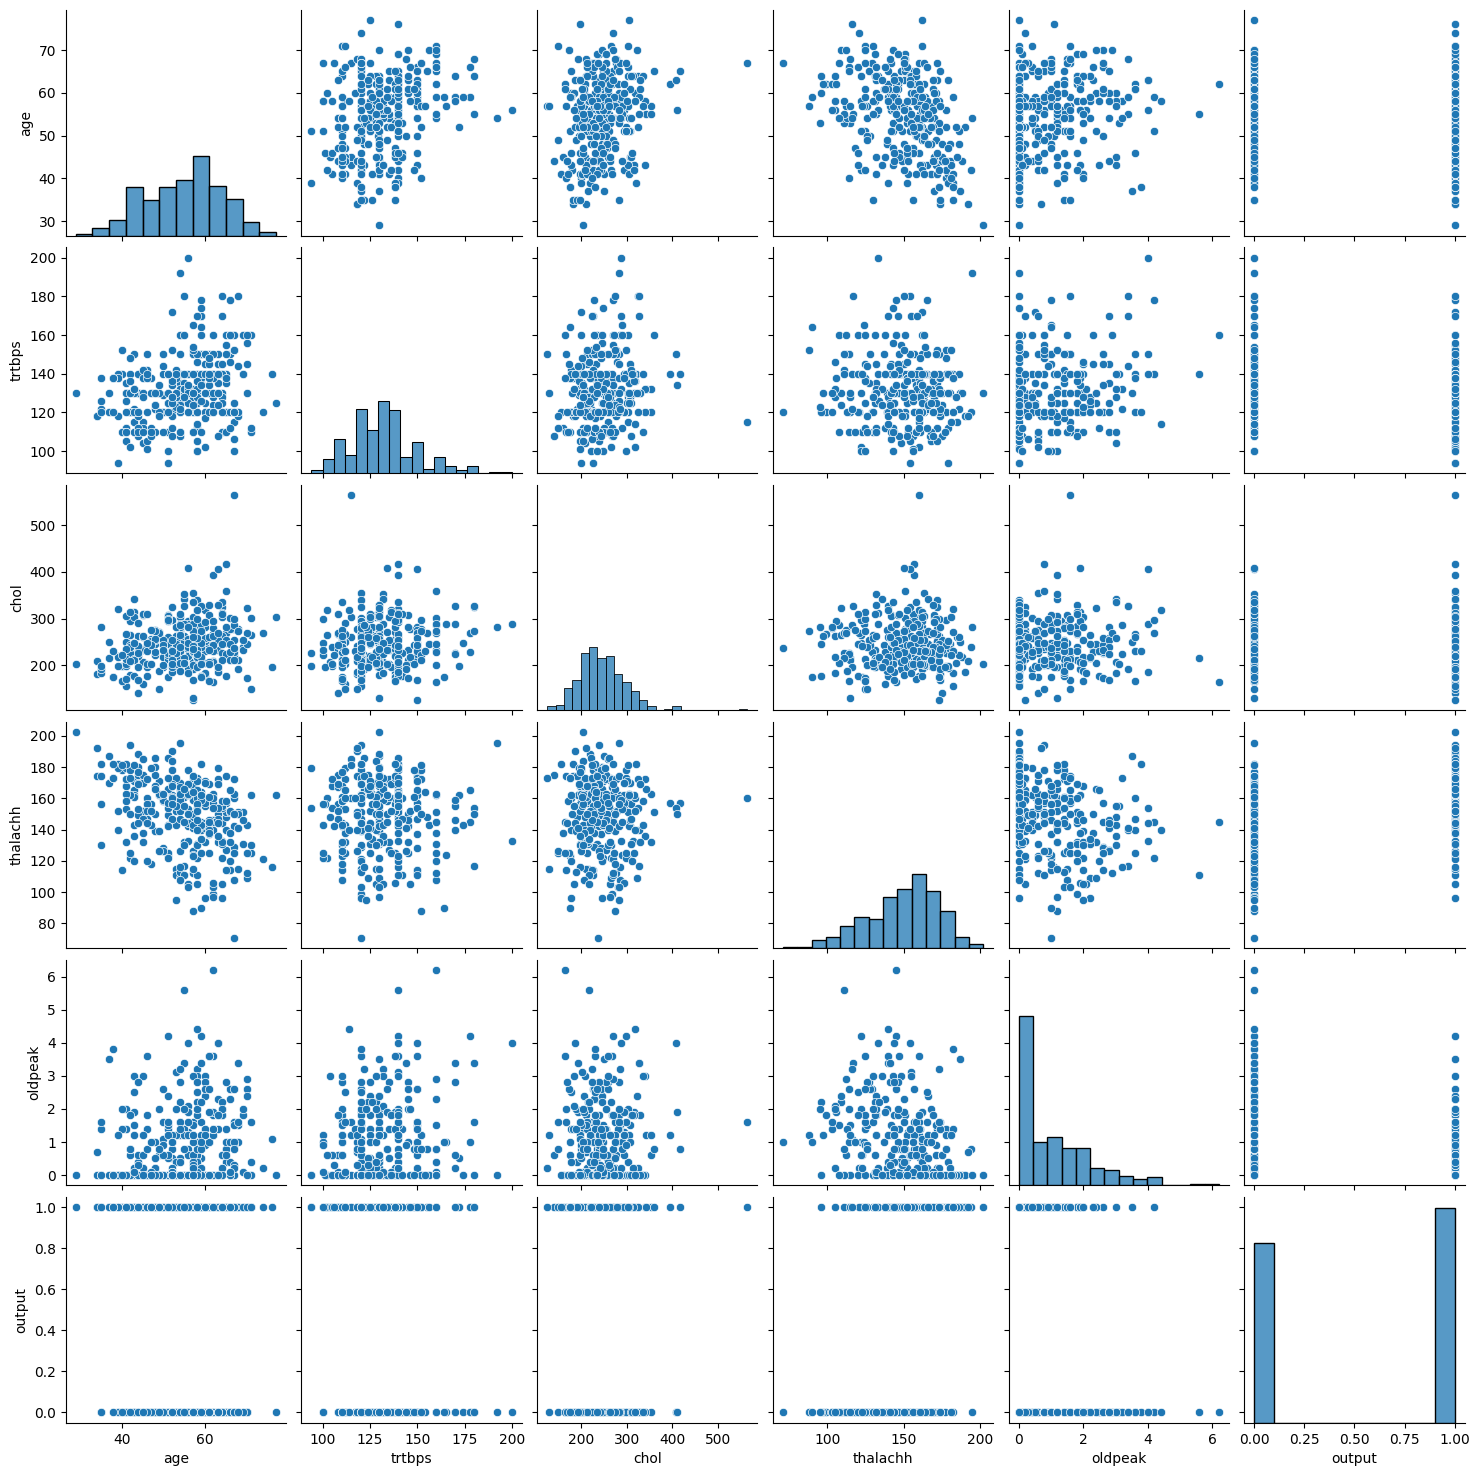

In [ ]:
sns.pairplot(df[numeric + ['output']])#, hue='output')

In [ ]:
#Propocessing data using skleanr
from sklearn.model_selection import train_test_split

X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numeric = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
ordinal = ['caa']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']

numeric_transformer = Pipeline([('inputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())
                               ])
cat_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                             ('onehot', OneHotEncoder())
                            ])
ordinal_transformer = Pipeline([('inputer', SimpleImputer(strategy='most_frequent')),
                               ('ord_encod', OrdinalEncoder())
                               ])

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric),
                                ('ordinal', ordinal_transformer, ordinal),
                                ('cat', cat_transformer, categorical),
                                ])

scaler = preprocessor.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

#X preserves ther order in which the variables were fed to the transformer
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.317678,-1.267082,1.667757,-0.255294,1.625761,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.457233,-1.870048,0.977913,-1.022383,-0.131861,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.887456,1.747748,-1.609005,-0.170062,4.304043,3.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.203722,0.059443,-1.225758,-1.874703,0.872494,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.163744,-1.146489,0.805451,0.170866,-0.885128,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.431633,-0.664116,1.763569,0.980571,-0.885128,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
208,-2.303299,-0.784709,-1.264082,1.065803,-0.885128,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
209,-0.366055,0.541816,0.958750,-1.150231,2.630117,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
210,-1.505610,-1.568565,-0.957485,0.810107,-0.885128,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#list of encoded attributes
cat_encoder = preprocessor.named_transformers_['cat'] # cat Pipe object
cat = list(cat_encoder.get_feature_names_out()) #get_feature_names_out Pipe method
features_names = numeric + ordinal + cat #concatenating
print(features_names)

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'slp_0', 'slp_1', 'slp_2', 'thall_0', 'thall_1', 'thall_2', 'thall_3']


In [ ]:
#Trainnig three ML models.
#A basic example
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=26))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_trans, y_train, epochs=10, verbose=0)
model.summary()
loss, accuracy = model.evaluate(X_test_trans, y_test)

# print the accuracy
print("Validation accuracy: {:.2f}%".format(accuracy * 100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.8132
Validation accuracy: 81.32%


In [ ]:
#First model , one single layer (use grid search for parameter selection)

from scikeras.wrappers import KerasClassifier, KerasRegressor

def create_model_grid(activation='relu', optimizer='rmsprop', neurons=20):
    model = Sequential()
    model.add(Dense(neurons, input_dim=26, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model_grid = KerasClassifier(model=create_model_grid, activation='relu', neurons=10, #add parameters from model not included in KerasClassifier
                        epochs=10, 
                        batch_size=32, 
                        verbose=0)

In [ ]:
activations = ['tanh','relu','sigmoid']
neurons = [10,15,20,26,30,35]

param_grid = dict(activation =  activations, 
                  neurons=neurons)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model_grid, 
                    param_grid=param_grid,
                    cv = 4,
                    verbose=2)

In [ ]:
#grid

In [ ]:
grid = grid.fit(X_train_trans, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] END ........................activation=tanh, neurons=10; total time=   1.5s
[CV] END ........................activation=tanh, neurons=10; total time=   1.2s
[CV] END ........................activation=tanh, neurons=10; total time=   1.6s
[CV] END ........................activation=tanh, neurons=10; total time=   1.3s
[CV] END ........................activation=tanh, neurons=15; total time=   1.3s
[CV] END ........................activation=tanh, neurons=15; total time=   1.3s
[CV] END ........................activation=tanh, neurons=15; total time=   2.0s
[CV] END ........................activation=tanh, neurons=15; total time=   1.8s
[CV] END ........................activation=tanh, neurons=20; total time=   1.4s
[CV] END ........................activation=tanh, neurons=20; total time=   1.5s
[CV] END ........................activation=tanh, neurons=20; total time=   1.2s
[CV] END ........................activation=tanh

In [ ]:
#Results
print('best cv score : ', grid.best_score_)
print('best hyperparameters : ', grid.best_params_)
print('score for test set : ', grid.score(X_test_trans, y_test))
model = grid.best_estimator_

best cv score :  0.8160377358490566
best hyperparameters :  {'activation': 'tanh', 'neurons': 35}
score for test set :  0.8351648351648352


In [ ]:
#model.model_.summary()

In [ ]:
#Double checking the KerasClassifier object
model_training_score = model.score(X_train_trans, y_train)
model_test_score = model.score(X_test_trans, y_test)
model_test_score 

0.8351648351648352

In [ ]:
#second model: two hidden layers
def create_model_grid(activation='relu', neurons_l1=20, neurons_l2=20):
    model = Sequential()
    model.add(Dense(neurons_l1, input_dim=26, activation=activation))
    model.add(Dense(neurons_l2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_grid_1 = KerasClassifier(model=create_model_grid, activation='relu', neurons_l1=20, neurons_l2=20,
                        batch_size=32, 
                        verbose=0)

In [ ]:
activations = ['tanh','relu','sigmoid']
neurons_l1 = [10,15,20,26,30]
neurons_l2 = [10,15,20,26,30]

param_grid_1 = dict(activation=activations, 
                  neurons_l1=neurons_l1,
                 neurons_l2=neurons_l2)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_1 = GridSearchCV(estimator=model_grid_1, 
                    param_grid=param_grid_1,
                    cv = 4,
                    verbose=2)

grid_1 = grid_1.fit(X_train_trans, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=10; total time=   1.3s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=10; total time=   1.3s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=10; total time=   1.7s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=10; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=15; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=15; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=15; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=15; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=20; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=20; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, neurons_l2=20; total time=   1.2s
[CV] END ......activation=tanh, neurons_l1=10, 

In [ ]:
grid_1

GridSearchCV(cv=4,
             estimator=KerasClassifier(activation='relu', batch_size=32, model=<function create_model_grid at 0x0000023ED7A27280>, neurons_l1=20, neurons_l2=20, verbose=0),
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'neurons_l1': [10, 15, 20, 26, 30],
                         'neurons_l2': [10, 15, 20, 26, 30]},
             verbose=2)

In [ ]:
#model_1 = grid_1.best_estimator_
#model_1.model_.summary()

Model: "sequential_3430"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10466 (Dense)         (None, 26)                702       
                                                                 
 dense_10467 (Dense)         (None, 15)                405       
                                                                 
 dense_10468 (Dense)         (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Results
print('best cv score : ', grid_1.best_score_)
print('best hyperparameters : ', grid_1.best_params_)
print('score for test set : ', grid_1.score(X_test_trans, y_test))
model_1 = grid_1.best_estimator_

best cv score :  0.7405660377358492
best hyperparameters :  {'activation': 'tanh', 'neurons_l1': 26, 'neurons_l2': 15}
score for test set :  0.7252747252747253


In [ ]:
#Double checking the KerasClassifier object
model_1_training_score = model_1.score(X_train_trans, y_train)
model_1_test_score = model_1.score(X_test_trans, y_test)
model_1_test_score

0.7252747252747253

In [ ]:
#Repeating with three hidden layers
def create_model_grid(activation='relu', neurons_l1=20, neurons_l2=20, neurons_l3=20):
    model = Sequential()
    model.add(Dense(neurons_l1, input_dim=26, activation=activation))
    model.add(Dense(neurons_l2, activation=activation))
    model.add(Dense(neurons_l3, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_grid_2 = KerasClassifier(model=create_model_grid, activation='relu', neurons_l1=20, neurons_l2=20, neurons_l3=20,
                        batch_size=32, 
                        verbose=0)

In [ ]:
activations = ['tanh','relu','sigmoid']
neurons_l1 = [10,15,20,26,30]
neurons_l2 = [10,15,20,26,30]
neurons_l3 = [10,15,20,26,30]

param_grid_2 = dict(activation=activations, 
                  neurons_l1=neurons_l1,
                  neurons_l2=neurons_l2,
                  neurons_l3=neurons_l3)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_2 = GridSearchCV(estimator=model_grid_2, 
                    param_grid=param_grid_2,
                    cv = 4,
                    verbose=2)

grid_2 = grid_2.fit(X_train_trans, y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=10; total time=   2.9s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=10; total time=   3.7s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=10; total time=   3.3s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=10; total time=   3.0s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=15; total time=   2.8s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=15; total time=   3.3s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=15; total time=   3.9s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=15; total time=   2.1s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=20; total time=   2.0s
[CV] END activation=tanh, neurons_l1=10, neurons_l2=10, neurons_l3=20; total time=   2.0s
[CV] END activation=tanh, neurons_l1

In [ ]:
#grid_2

In [ ]:
#model_2 = grid_2.best_estimator_
#model_2.model_.summary()

In [ ]:
#Results
print('best cv score : ', grid_2.best_score_)
print('best hyperparameters : ', grid_2.best_params_)
print('score for test set : ', grid_2.score(X_test_trans, y_test))
model_2 = grid_2.best_estimator_

best cv score :  0.7971698113207548
best hyperparameters :  {'activation': 'tanh', 'neurons_l1': 26, 'neurons_l2': 20, 'neurons_l3': 30}
score for test set :  0.7472527472527473


In [ ]:
#Double checking the KerasClassifier object
model_2_training_score = model_2.score(X_train_trans, y_train)
model_2_test_score = model_2.score(X_test_trans, y_test)
model_2_test_score 

0.7472527472527473

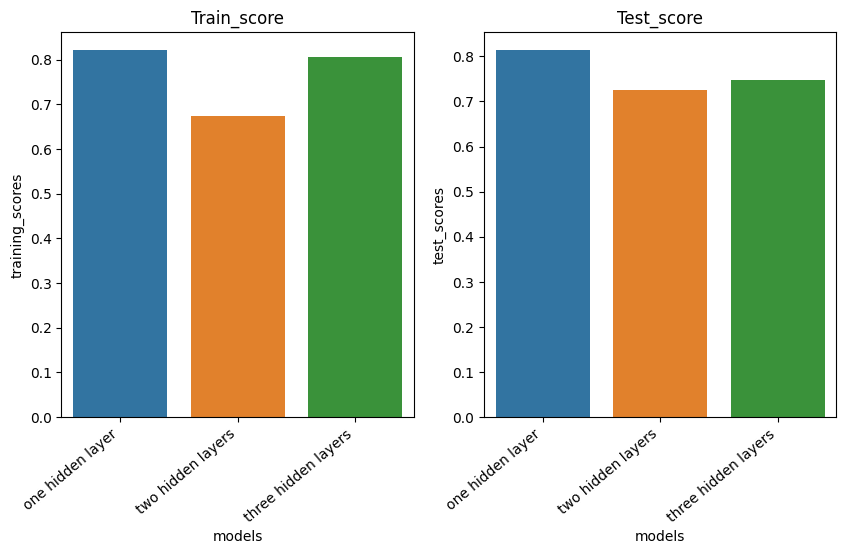

In [ ]:
models = ['one hidden layer', 'two hidden layers', 'three hidden layers']
test_scores = [model_test_score, model_1_test_score, model_2_test_score]
training_scores = [model_training_score, model_1_training_score, model_2_training_score]

df_scores = pd.DataFrame({'models' : models,
                         'test_scores' : test_scores,
                         'training_scores' : training_scores})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='models', y='training_scores', ax=ax1, data=df_scores)
sns.barplot(x='models', y='test_scores', ax=ax2, data=df_scores)

# set titles for plots
ax1.set_title("Train_score")
ax2.set_title("Test_score")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

# display the plots
plt.show()

In [ ]:
#the chosen model is the first one: 
#best hyperparameters :  {'activation': 'relu', 'neurons': 30}
grid.best_params_

{'activation': 'sigmoid', 'neurons': 26}

In [ ]:
#Feature importance using permutation for train set
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_train_trans, y_train,
                           n_repeats=30,
                           random_state=0)

In [ ]:
#getting feature names
cat_encoder = preprocessor.named_transformers_['cat']
cat = list(cat_encoder.get_feature_names_out())
feature_names = numeric + ordinal + cat
#features_names

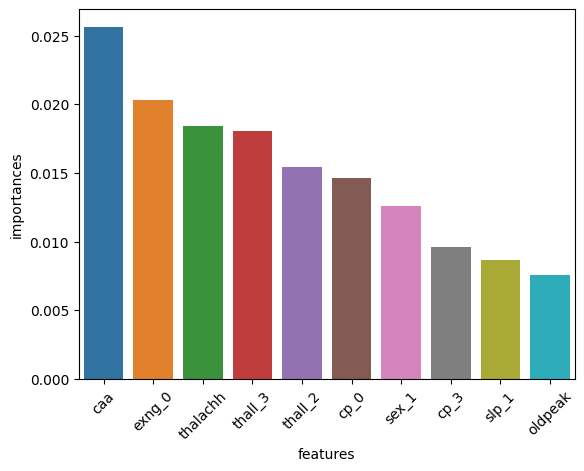

In [ ]:
#feature_names = [f"feature {i}" for i in range(X_train_trans.shape[1])]

model_importances = pd.DataFrame({'features' : feature_names,
                                 'importances' : r.importances_mean,
                                 'std_importances' : r.importances_std})

model_importances = model_importances.sort_values(by='importances', ascending=False).reset_index().head(10)

fig, ax = plt.subplots()
sns.barplot(x='features', y='importances', data=model_importances)
ax.set_xticklabels(labels=model_importances.features, rotation=45)
plt.show()

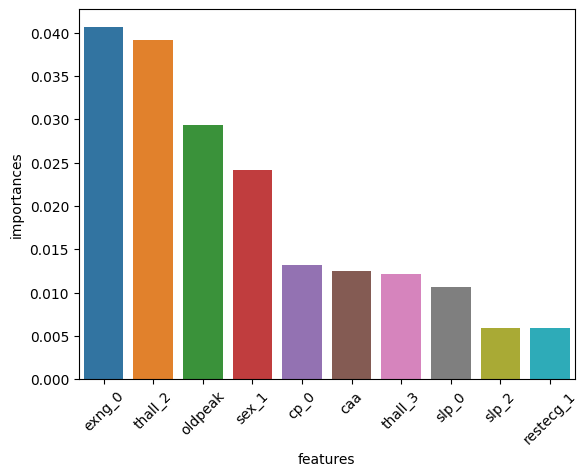

In [ ]:
#feature importance for test set
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test_trans, y_test,
                           n_repeats=30,
                           random_state=0)

#feature_names = [f"feature {i}" for i in range(X_train_trans.shape[1])]

model_importances = pd.DataFrame({'features' : feature_names,
                                 'importances' : r.importances_mean,
                                 'std_importances' : r.importances_std})

model_importances = model_importances.sort_values(by='importances', ascending=False).reset_index().head(10)

fig, ax = plt.subplots()
sns.barplot(x='features', y='importances', data=model_importances)
ax.set_xticklabels(labels=model_importances.features, rotation=45)
#ax.set_title('Test set')
plt.show()